# Multiple Testing

In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.libqsturng import psturng

In [3]:
def setData():
    ''' Set up the data, as a structured array. '''
    
    # The first and last field are 32-bit intergers; the second field is an
    # 8-byte string. Note that here we can also give names to the individual
    # fields!
    data = np.rec.array([
    (  1,   'mental',  2 ),
    (  2,   'mental',  2 ),
    (  3,   'mental',  3 ),
    (  4,   'mental',  4 ),
    (  5,   'mental',  4 ),
    (  6,   'mental',  5 ),
    (  7,   'mental',  3 ),
    (  8,   'mental',  4 ),
    (  9,   'mental',  4 ),
    ( 10,   'mental',  4 ),
    ( 11, 'physical',  4 ),
    ( 12, 'physical',  4 ),
    ( 13, 'physical',  3 ),
    ( 14, 'physical',  5 ),
    ( 15, 'physical',  4 ),
    ( 16, 'physical',  1 ),
    ( 17, 'physical',  1 ),
    ( 18, 'physical',  2 ),
    ( 19, 'physical',  3 ),
    ( 20, 'physical',  3 ),
    ( 21,  'medical',  1 ),
    ( 22,  'medical',  2 ),
    ( 23,  'medical',  2 ),
    ( 24,  'medical',  2 ),
    ( 25,  'medical',  3 ),
    ( 26,  'medical',  2 ),
    ( 27,  'medical',  3 ),
    ( 28,  'medical',  1 ),
    ( 29,  'medical',  3 ),
    ( 30,  'medical',  1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])
    return data

In [4]:
def doAnova(data):
    '''one-way ANOVA'''
    
    df = pd.DataFrame(data)
    model = ols('StressReduction ~ C(Treatment)',df).fit()
    
    anovaResults =  anova_lm(model)
    print(anovaResults)
    if anovaResults['PR(>F)'][0] < 0.05:
        print('One of the groups is different.')

In [5]:
def doTukey(data, multiComp):    
    '''Do a pairwise comparison, and show the confidence intervals'''
    
    print((multiComp.tukeyhsd().summary()))
    
    # Calculate the p-values:
    res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
    df = pd.DataFrame(data)
    numData = len(df)
    numTreatments = len(df.Treatment.unique())
    dof = numData - numTreatments
    
    # Show the group names
    print((multiComp.groupsunique))
    
    # Generate a print -------------------
    
    # Get the data
    xvals = np.arange(3)
    res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
    errors = np.ravel(np.diff(res2.confint)/2)
    
    # Plot them
    plt.plot(xvals, res2.meandiffs, 'o')
    plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')
    
    # Put on labels
    pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
    plt.xticks(xvals, pair_labels)
    
    # Format the plot
    xlim = -0.5, 2.5
    plt.hlines(0, *xlim)
    plt.xlim(*xlim)
    plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' +
              '\n Pairwise Mean Differences')          
    
    # Save to outfile, and show the data
    #outFile = 'multComp.png'
    #showData(outFile)

In [6]:
# Get the data
    data = setData()
    
    # Do a one-way ANOVA
    doAnova(data)
    
    #Then, do the multiple testing
    multiComp = MultiComparison(data['StressReduction'], data['Treatment'])
    
    doTukey(data, multiComp)    # Tukey's HSD test

                df     sum_sq   mean_sq         F    PR(>F)
C(Treatment)   2.0  11.666667  5.833333  5.163934  0.012617
Residual      27.0  30.500000  1.129630       NaN       NaN
One of the groups is different.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
b'medical'   b'mental'      1.5 0.0105  0.3217 2.6783   True
b'medical' b'physical'      1.0 0.1079 -0.1783 2.1783  False
 b'mental' b'physical'     -0.5 0.5498 -1.6783 0.6783  False
------------------------------------------------------------
[b'medical' b'mental' b'physical']


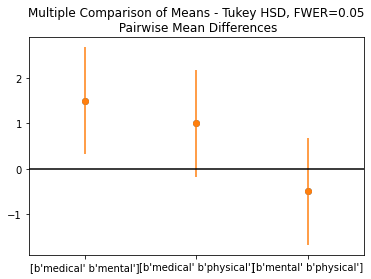

In [7]:
plt.show()